In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random

In [2]:
point_grid_path = "./out/build/grid_points.dat"
index_map_path = "./out/build/index_map.dat"
shadow_map_path = "./out/build/shadow_map.dat"

azimuth_map_path = "./out/build/azimuth_map.dat"
elevation_map_path = "./out/build/elevation_map.dat"

horizon_factor_path = "./out/build/horizon_factor_map.dat"
sky_view_factor_path = "./out/build/sky_view_factor_map.dat"

In [3]:
point_grid = np.loadtxt(point_grid_path)
horizon_factor_path = np.memmap(horizon_factor_path, dtype=np.float16, mode='r')
sky_view_factor_path = np.memmap(sky_view_factor_path, dtype=np.int32, mode='r')

index_map = np.memmap(index_map_path, dtype=np.uint32, mode='r')
azimuth_map = np.memmap(azimuth_map_path, dtype=np.float16, mode='r')
elevation_map = np.memmap(elevation_map_path, dtype=np.float16, mode='r')

In [4]:
voxel_dim = (587,590,50)
voxel_size = 2.0
num_samples = 360*90
index_dim = (90,360)

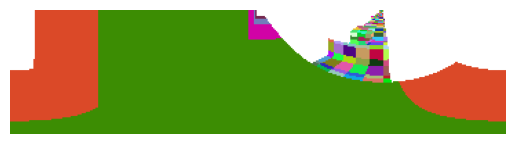

sky view factor:  0.2028395061728395
horizon factor:  0.0
point info:  ['84710.50000', '445936.00000', '0.37267', '-0.30203', '0.95330', '0.00000', '0.00000']


In [5]:
point_idx = 19502

index_start = point_idx*num_samples
index_end = (point_idx+1)*num_samples

voxel_indices = index_map[index_start:index_end]
voxel_indices = voxel_indices.reshape(index_dim)
unique_values = np.unique(voxel_indices)

# 创建一个随机颜色映射，确保白色为最大值对应的颜色
colors = {}
for value in unique_values:
    if value == np.iinfo(np.uint32).max:
        colors[value] = (1.0, 1.0, 1.0)  # 白色
    else:
        colors[value] = (random.random(), random.random(), random.random())

# 将图像数据转换为 RGB
image = np.zeros((voxel_indices.shape[0], voxel_indices.shape[1], 3))

for i in range(voxel_indices.shape[0]):
    for j in range(voxel_indices.shape[1]):
        image[i, j] = colors[voxel_indices[i, j]]

image = np.flipud(image)
plt.imshow(image)
plt.axis('off')  # 隐藏坐标轴
plt.show()

print("sky view factor: ", sky_view_factor_path[point_idx]/num_samples)
print("horizon factor: ", horizon_factor_path[point_idx])
formatted_values = [f"{x:.5f}" for x in point_grid[point_idx]]
print("point info: ", formatted_values)
